In [7]:
import pandas as pd

# Read the feature names CSV file
feature_names = pd.read_csv('Feature Name.csv')

# Create a list of feature names
header_list = feature_names['Feature'].tolist()

# Read the dataset CSV file
dataset = pd.read_csv('Dataset.csv', names=header_list)

# Print the first few rows of the dataset and feature names
dataset


,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF,Fatigue_level
0,-7082.108609,568.164429,593.320009,727.671625,9456.718907,610.892516,672.664608,744.159826,-744.252427,567.506829,...,0.247898,0.989183,247.044115,611.569045,306.910586,514.609792,0.385845,0.234438,8.372799,1
1,3618.245437,1537.254629,1540.972428,1855.355638,4828.685519,2177.145176,2187.176663,2466.309254,-638.476505,1500.476246,...,0.195446,0.912529,713.389659,1127.501511,767.921875,968.529167,0.426387,0.192446,7.684195,1
2,-1539.312493,2426.076723,2428.697877,2399.474310,-5421.387863,4325.733672,4335.967864,4673.869608,173.236814,1786.550574,...,0.198108,0.880923,2214.542677,4157.944918,2493.259693,3969.429341,0.501780,0.220765,7.496121,1
3,7033.417484,4093.630313,4098.750633,4226.794681,12939.540257,5757.809481,5771.405144,5956.878301,-471.185026,2576.663841,...,0.196975,0.866541,1845.087028,3967.695662,2170.624354,3711.081268,0.442899,0.234207,7.517077,1
4,6806.563555,5668.820658,5674.815026,5161.800619,9194.092868,5947.973167,5957.315658,6586.179357,-380.324080,3116.816583,...,0.198009,0.862710,1570.583077,2590.940237,1707.822718,2133.200211,0.286129,0.200091,7.290842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1.459953,302.165254,301.503058,1138.739949,-0.608012,118.889854,118.661495,542.764377,6.080662,205.739277,...,0.116385,1.273950,4.658602,3.314692,5.716955,11.004409,0.305160,0.216712,6.489056,2
1236,-1.432971,291.350671,290.770462,1050.589313,-6.159452,116.657386,116.625888,519.877863,-0.801293,212.987234,...,0.123922,1.844038,6.028471,6.045090,8.536235,21.298811,0.455111,0.258341,6.526541,2
1237,0.140037,286.360127,285.789324,1125.245420,0.115397,118.160392,117.925226,544.940458,-4.547205,215.121415,...,0.129963,0.835486,7.906608,9.449667,12.319276,32.551617,0.580757,0.417305,36.348074,2
1238,1.423339,301.925060,301.370889,1322.046915,-0.105598,134.099715,133.853402,612.407125,-5.898012,226.485897,...,0.130355,0.803396,4.222231,3.057452,5.212554,10.940857,0.413170,0.189037,7.795994,3


In [65]:
dataset.iloc[:, -1] = dataset.iloc[:, -1] - 1


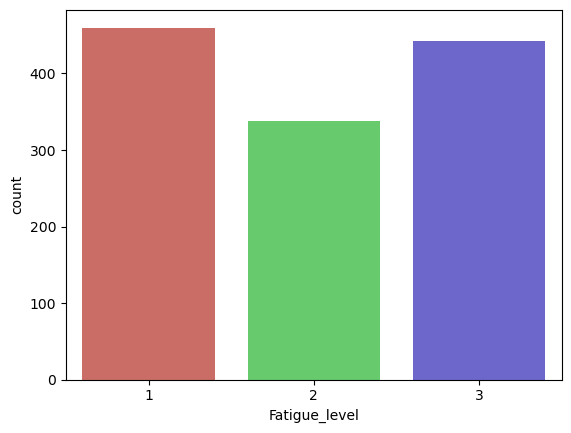

In [2]:
# Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Class' with the actual target variable name in your dataset
target_variable = 'Fatigue_level'

# Create a countplot
sns.countplot(x=target_variable, data=dataset, palette='hls')
plt.show()

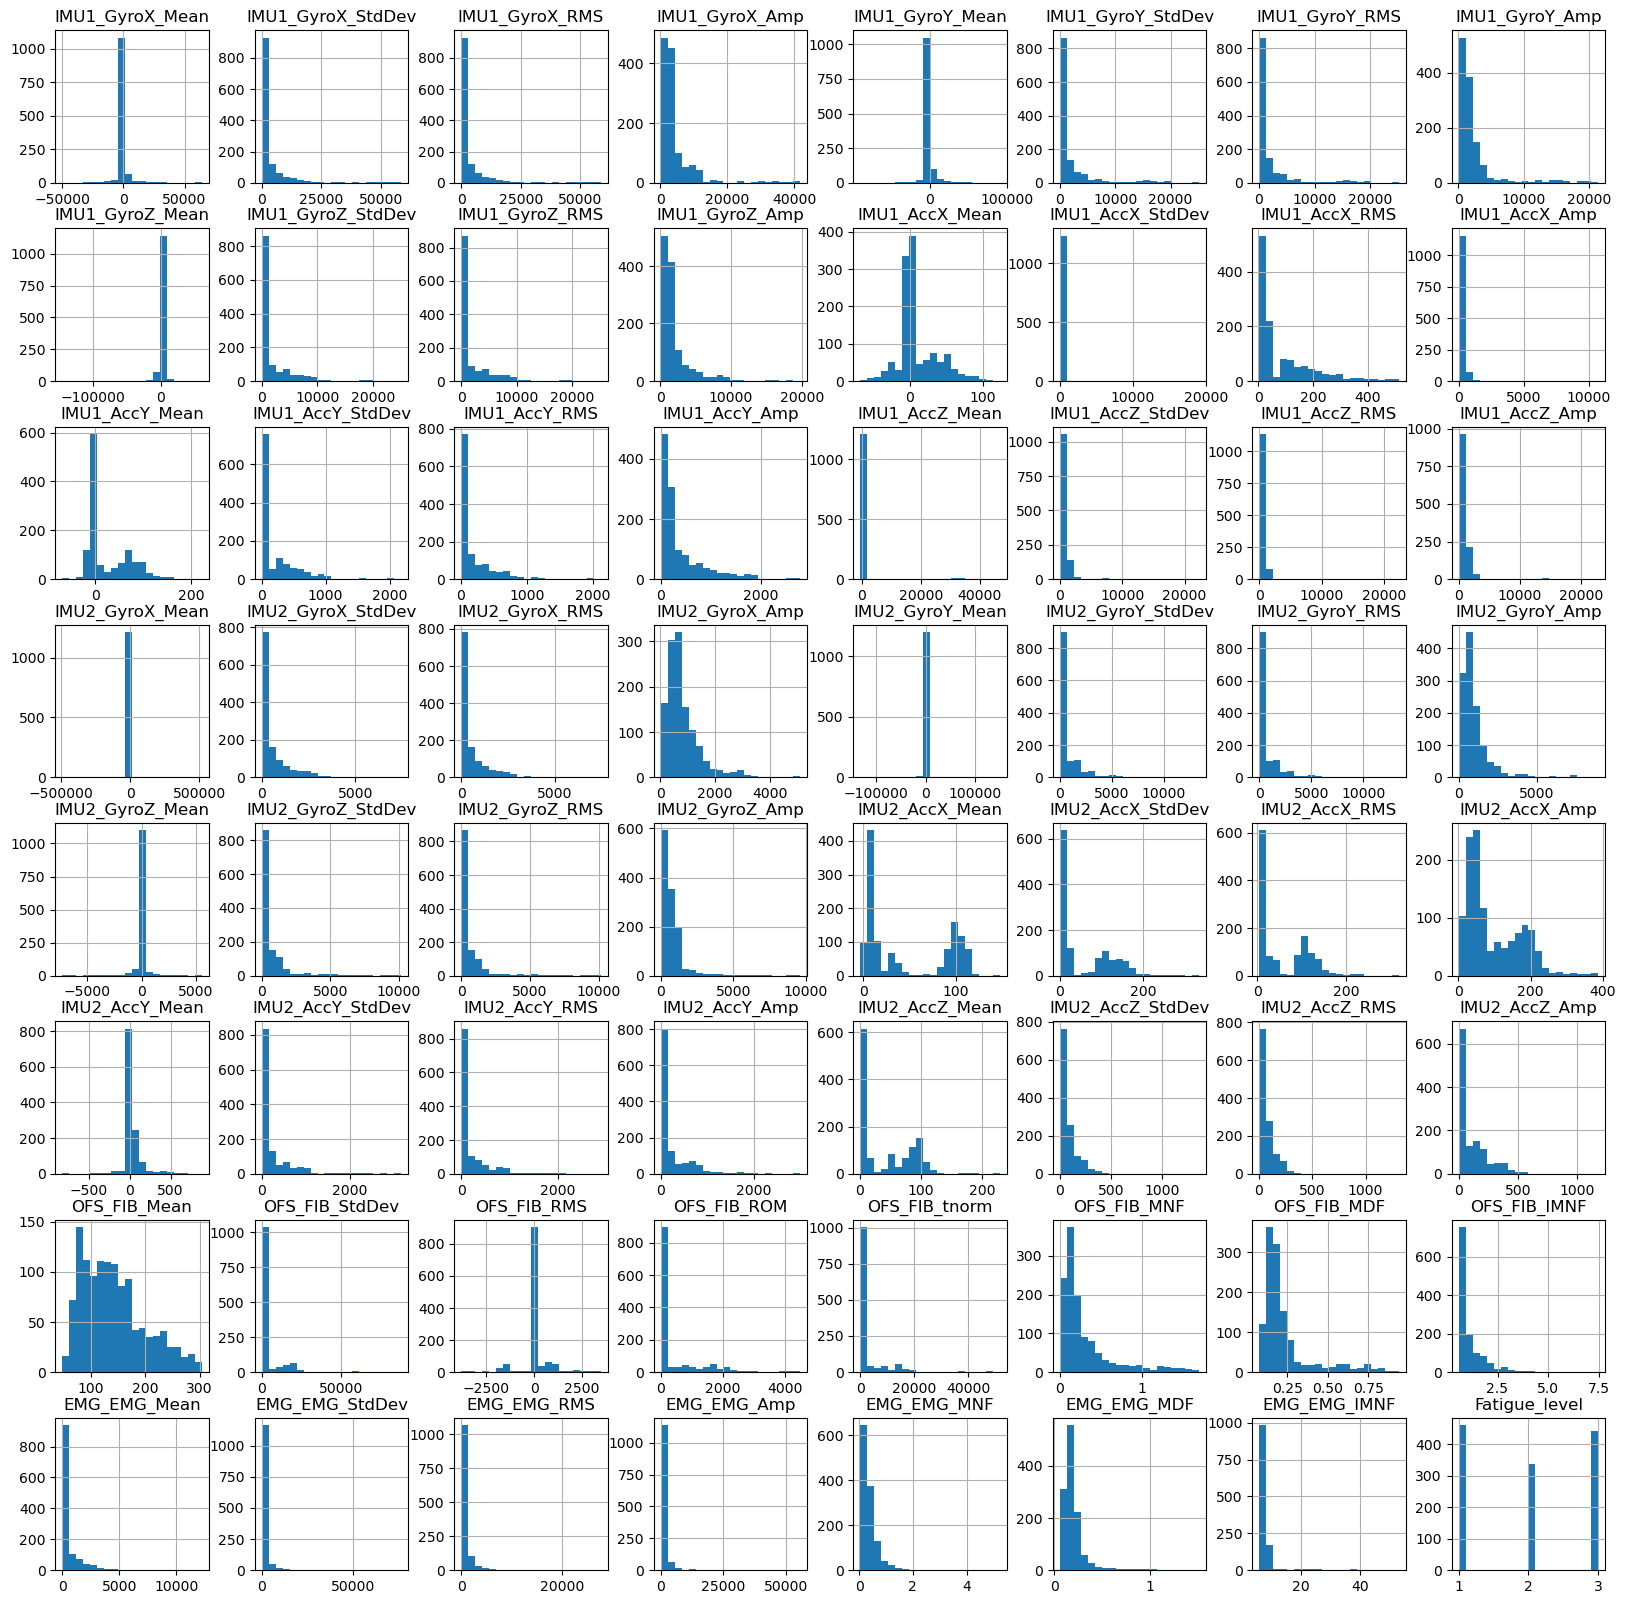

In [3]:
# Create a histogram
dataset.hist(bins=20, figsize=(20, 20))
plt.show()

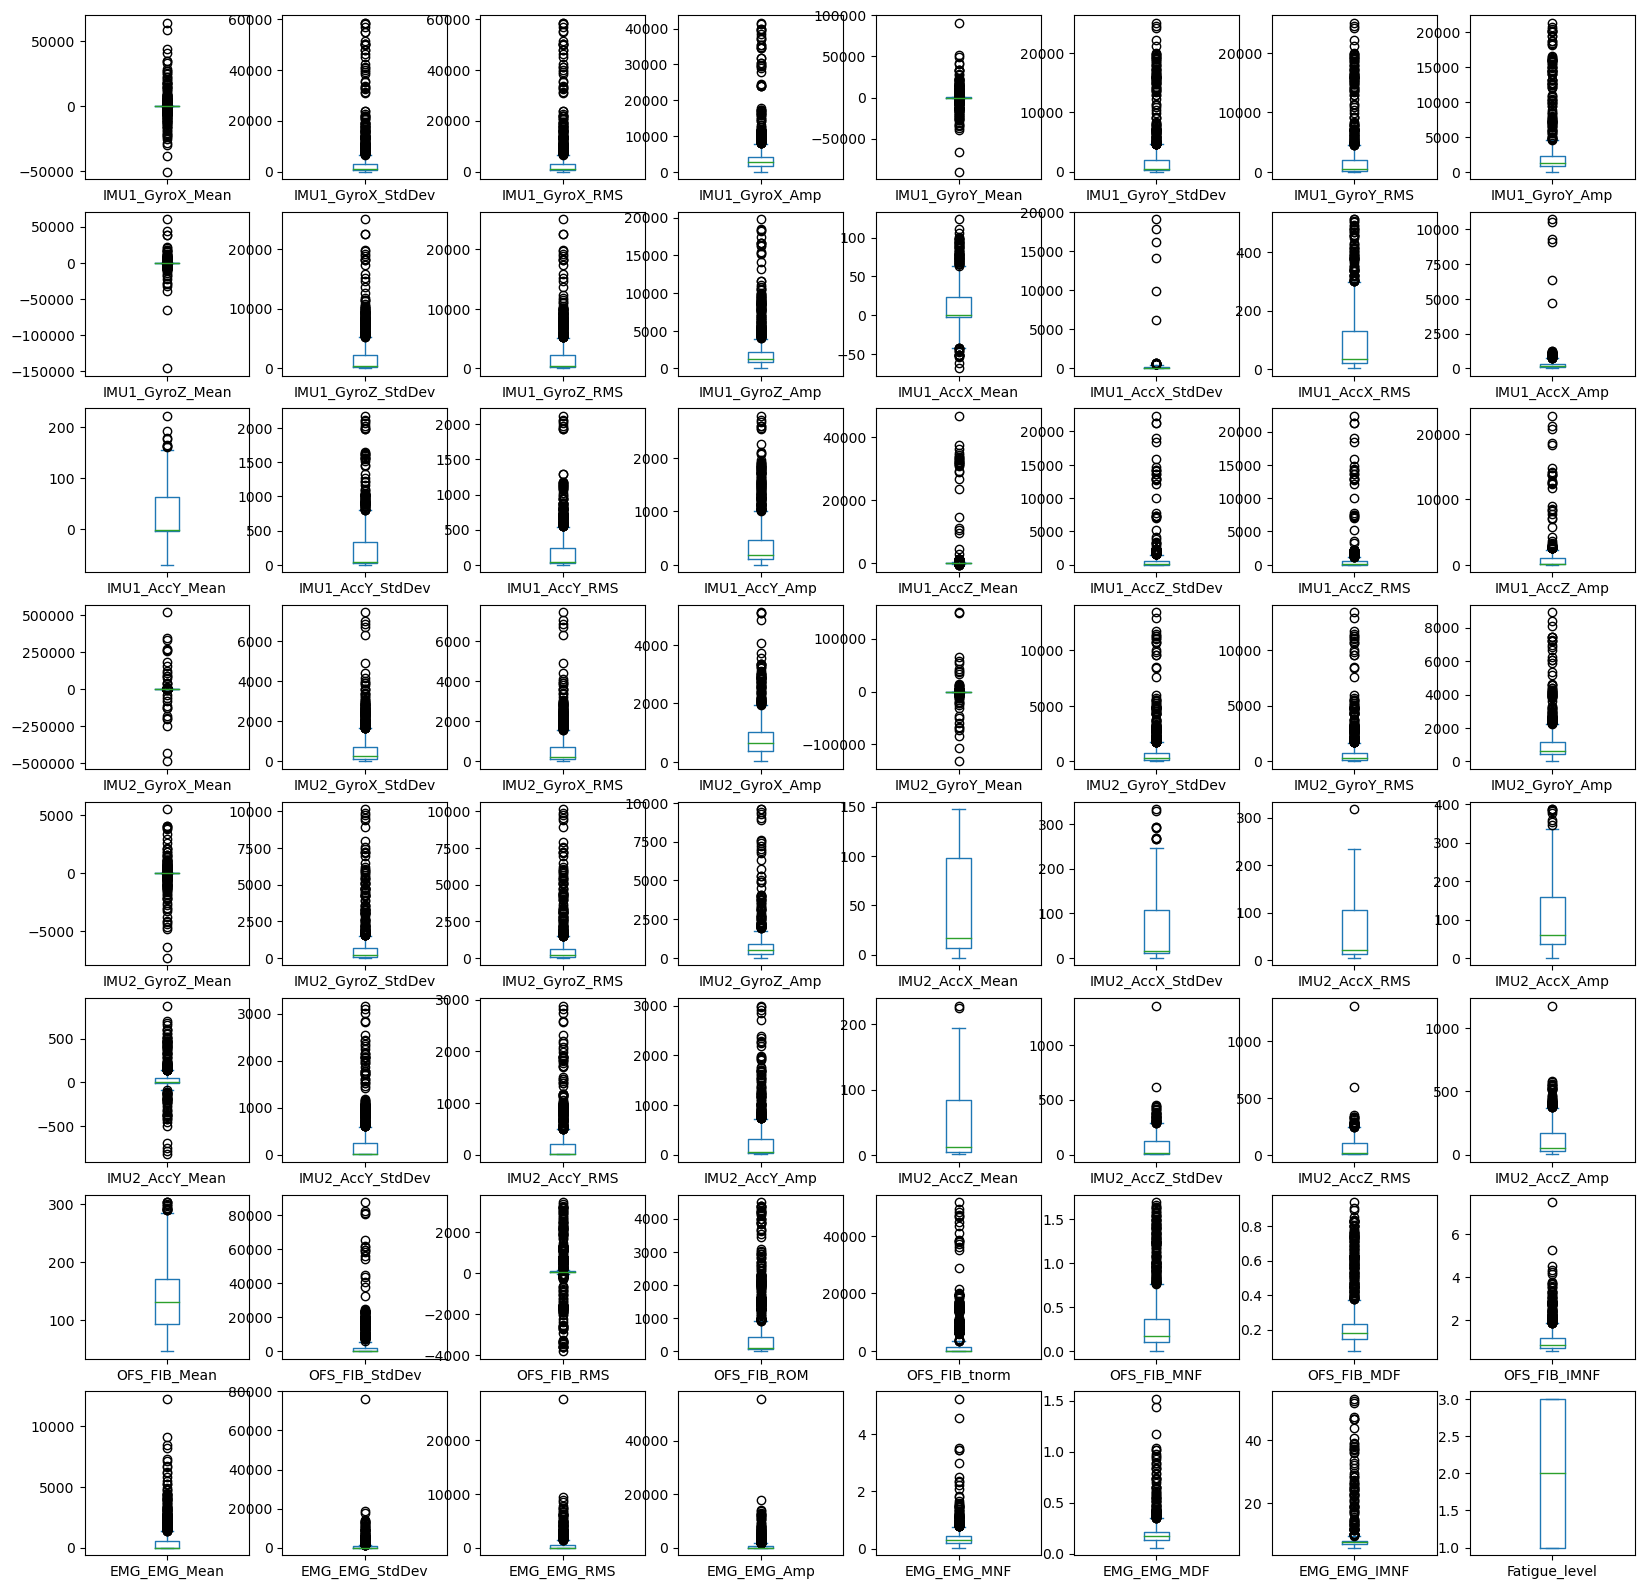

In [4]:
# Calculate the number of rows and columns needed for the layout
n_cols = int(dataset.shape[1] ** 0.5)
n_rows = n_cols if n_cols * n_cols == dataset.shape[1] else n_cols + 1

# Create a boxplot
dataset.plot(kind='box', subplots=True, layout=(n_rows, n_cols), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

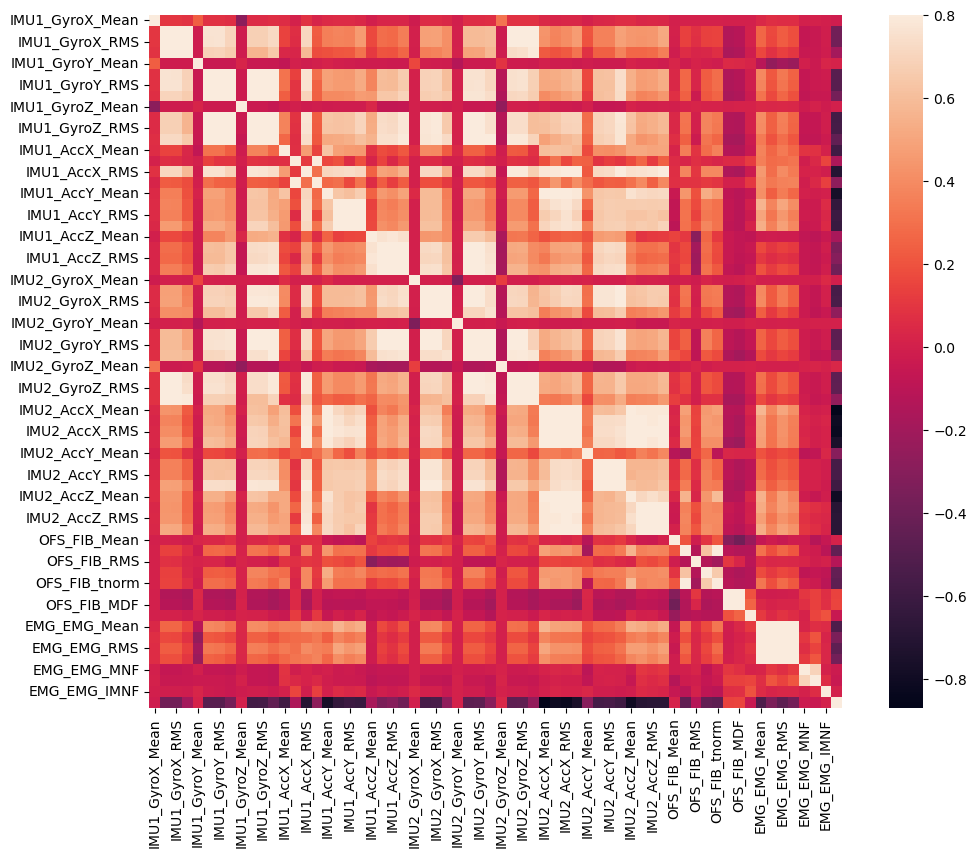

In [5]:
# Create a correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Separating features and labels
X = dataset.iloc[:, :-1]  # all rows, all columns except the last one
y = dataset.iloc[:, -1]   # all rows, only the last column

# Initialize LDA
lda_lsqr = LDA(solver='lsqr', shrinkage='auto') # LDA with Least Squares Solution, with shrinkage, suit for small sample size

# Fitting the LDA model
lda_transformed_lsqr = lda_lsqr.fit(X, y)


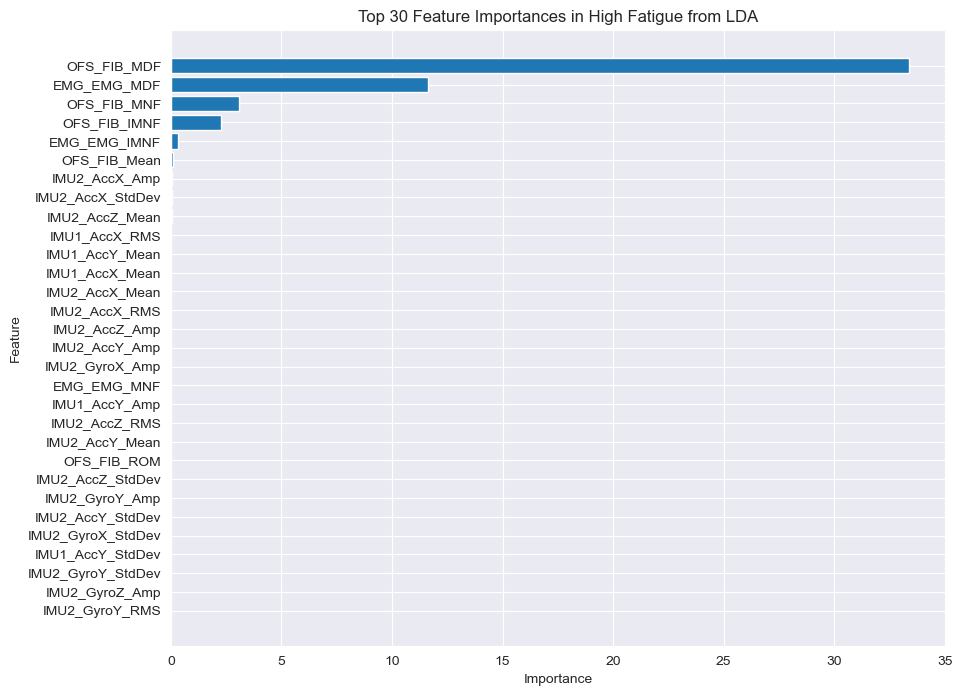

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the coefficients of the linear discriminants
lda_coefficients = lda_lsqr.coef_[2]  # high fatigue levels' coefficients
pd.DataFrame(lda_coefficients)

# Get the absolute values of the coefficients
importance = np.abs(lda_coefficients)


# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': header_list[:-1], 'Importance': importance})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:30], feature_importance['Importance'][:30])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances in High Fatigue from LDA')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


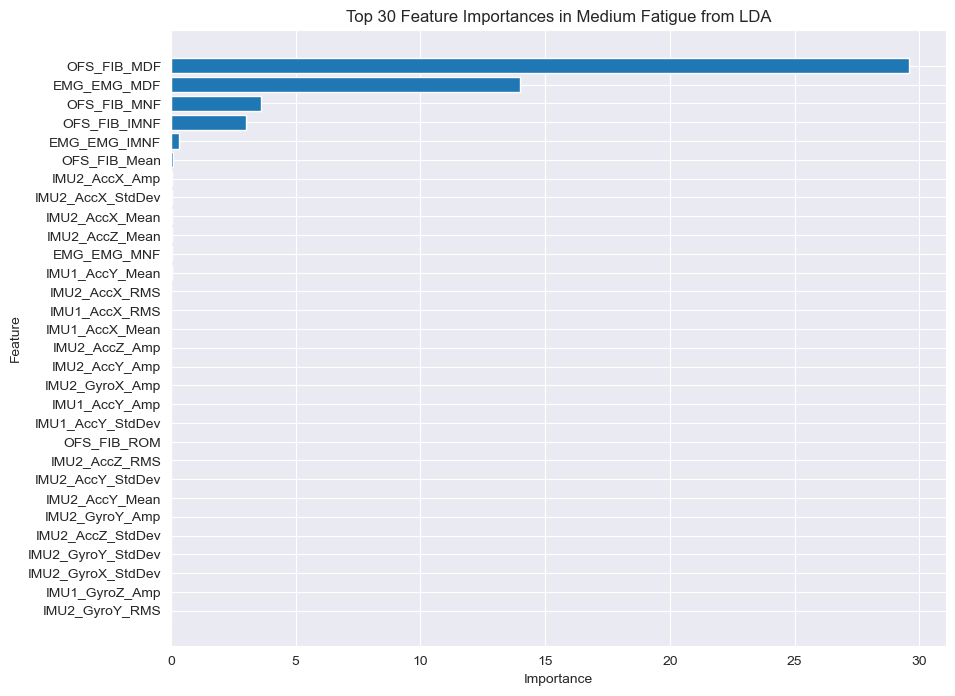

In [57]:
# Extract the coefficients of the linear discriminants
lda_coefficients = lda_lsqr.coef_[1]  # high fatigue levels' coefficients
pd.DataFrame(lda_coefficients)

# Get the absolute values of the coefficients
importance = np.abs(lda_coefficients)


# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': header_list[:-1], 'Importance': importance})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:30], feature_importance['Importance'][:30])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances in Medium Fatigue from LDA')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

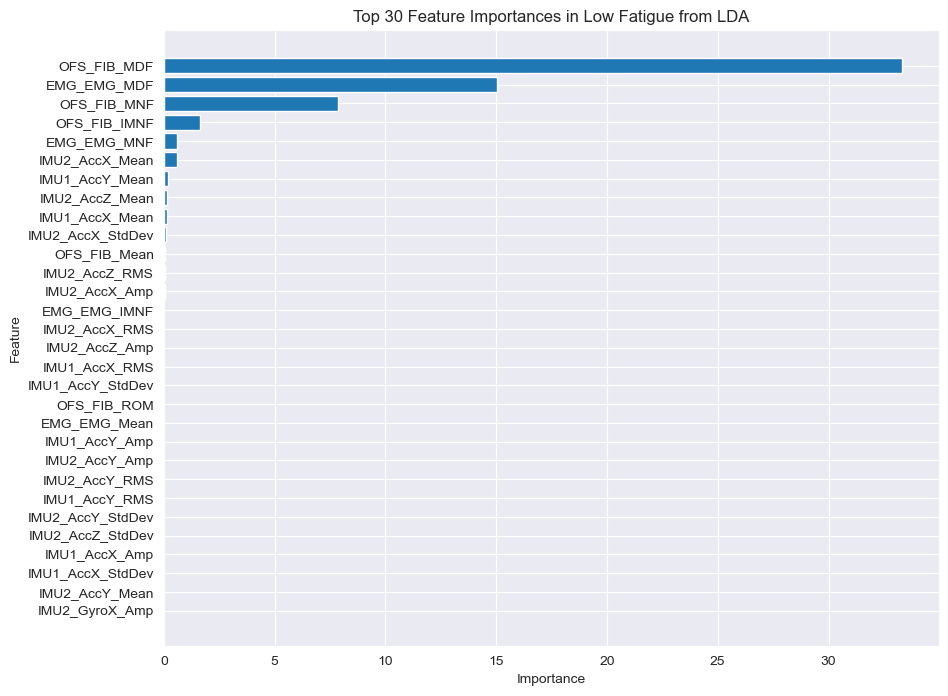

In [58]:
# Extract the coefficients of the linear discriminants
lda_coefficients = lda_lsqr.coef_[0]  # high fatigue levels' coefficients
pd.DataFrame(lda_coefficients)

# Get the absolute values of the coefficients
importance = np.abs(lda_coefficients)


# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': header_list[:-1], 'Importance': importance})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:30], feature_importance['Importance'][:30])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances in Low Fatigue from LDA')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [62]:
# Extract the coefficients of the linear discriminants
lda_coefficients_all = lda_lsqr.coef_  # high fatigue levels' coefficients
pd.DataFrame(lda_coefficients_all)

# Get the absolute values of the coefficients
importance = np.abs(lda_coefficients_all)
pd.DataFrame(importance, columns=header_list[:-1])

,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MNF,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF
0,0.000322,0.000059,0.000064,0.000708,0.000030,0.000271,0.000292,0.000004,0.000068,0.000699,...,7.847586,33.306001,1.640687,0.004260,0.000253,0.001070,0.000459,0.615203,15.049130,0.030341
1,0.000020,0.000151,0.000151,0.000613,0.000055,0.000160,0.000188,0.000683,0.000004,0.000588,...,3.591824,29.585985,3.021818,0.000275,0.000050,0.000114,0.000338,0.029885,13.976379,0.310153
2,0.000023,0.000195,0.000195,0.000720,0.000061,0.000261,0.000280,0.000876,0.000010,0.000664,...,3.058013,33.380769,2.272938,0.000366,0.000072,0.000104,0.000330,0.004545,11.634241,0.301039
